In [ ]:
%pip install "modin [all]"
%pip install pytz 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import shutil
import zipfile
import os
import glob

import pickle # dump variables
import numpy as np # linear algebra
import modin.pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt # datetime lib
import pytz

import seaborn as sns
import matplotlib.pyplot as plt

## custom matplot design

In [2]:
# Matplotlib styles and plot again.
%matplotlib inline
plt.rcdefaults()

sns.set(rc={'figure.figsize': tuple(plt.rcParams['figure.figsize'])})
sns.set(style="whitegrid", font_scale=1.75)

# prettify plots
plt.rcParams['figure.figsize'] = [20.0, 5.0]
plt.rcParams['figure.dpi'] = 200
sns.set_palette(sns.color_palette("muted"))

## You can also just do this in Colab/Jupyter, some "magic":
%config InlineBackend.figure_format='retina'
# See https://ipython.org/ipython-doc/3/api/generated/IPython.display.html
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')


## path 

In [ ]:
## colab setting 
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 소스 파일 경로
source_file_path = '/content/drive/MyDrive/Colab Notebooks/archive (4).zip'

# 대상 파일 경로
target_file_path = '/content/archive (4).zip'

# 파일 복사
shutil.copyfile(source_file_path, target_file_path)

# ZIP 파일 경로
zip_file_path = '/content/archive (4).zip'

# 언집할 폴더 경로
target_folder_path = '/content/dataset'

# ZIP 파일 언집
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(target_folder_path)

In [7]:
## local setting 

%cd /home/i4624/vscode/gitclone/SWbootProject_2023-7/Team-project

# CSV 파일들이 있는 디렉토리 경로
directory_path = '../Team-project/data/ieee-phm-2012-data-challenge-dataset-master/Full_Test_Set/Bearing1_6/'

# 디렉토리 내의 모든 CSV 파일 경로를 가져오기
file_paths = glob.glob(directory_path + '/*.csv')

# 파일 경로를 순서대로 정렬
file_paths = sorted(file_paths)

# 파일들을 담을 빈 DataFrame 생성
combined_data = pd.DataFrame()

# acc 파일만 불러오기 (파일명에 'acc'가 포함된 파일들)
acc_file_paths = [file_path for file_path in file_paths if 'acc' in file_path]



/home/i4624/vscode/gitclone/SWbootProject_2023-7/Team-project


In [8]:
acc_file_paths

['../Team-project/data/ieee-phm-2012-data-challenge-dataset-master/Full_Test_Set/Bearing1_6/acc_00001.csv',
 '../Team-project/data/ieee-phm-2012-data-challenge-dataset-master/Full_Test_Set/Bearing1_6/acc_00002.csv',
 '../Team-project/data/ieee-phm-2012-data-challenge-dataset-master/Full_Test_Set/Bearing1_6/acc_00003.csv',
 '../Team-project/data/ieee-phm-2012-data-challenge-dataset-master/Full_Test_Set/Bearing1_6/acc_00004.csv',
 '../Team-project/data/ieee-phm-2012-data-challenge-dataset-master/Full_Test_Set/Bearing1_6/acc_00005.csv',
 '../Team-project/data/ieee-phm-2012-data-challenge-dataset-master/Full_Test_Set/Bearing1_6/acc_00006.csv',
 '../Team-project/data/ieee-phm-2012-data-challenge-dataset-master/Full_Test_Set/Bearing1_6/acc_00007.csv',
 '../Team-project/data/ieee-phm-2012-data-challenge-dataset-master/Full_Test_Set/Bearing1_6/acc_00008.csv',
 '../Team-project/data/ieee-phm-2012-data-challenge-dataset-master/Full_Test_Set/Bearing1_6/acc_00009.csv',
 '../Team-project/data/ieee-

In [9]:
## csv learning data 속도 개선 
# Read all CSV files and combine them into a single DataFrame
combined_data = pd.concat((pd.read_csv(file_path, index_col=None, header=None) for file_path in acc_file_paths), ignore_index=True)


In [10]:
# Convert timestamp columns to integers and create a new DataFrame with these values
timestamp_integers = combined_data[[0, 1, 2, 3]].astype(int)
timestamp_integers.columns = ['hour', 'minute', 'second', 'microsecond']

# Combine the integer values to form a string in the format 'HH:MM:SS.microseconds'
combined_data['timestamp'] = timestamp_integers.apply(lambda x: f"{x['hour']:02d}:{x['minute']:02d}:{x['second']:02d}.{x['microsecond']:06d}", axis=1)

# Convert the 'timestamp' column to a Pandas datetime object
combined_data['timestamp'] = pd.to_datetime(combined_data['timestamp'], format='%H:%M:%S.%f')

(raylet) Error processing line 1 of /home/i4624/.local/lib/python3.10/site-packages/modin-autoimport-pandas.pth:
(raylet) 
(raylet)   Traceback (most recent call last):
(raylet)     File "/usr/lib/python3.10/site.py", line 192, in addpackage
(raylet)       exec(line)
(raylet)     File "<string>", line 1, in <module>
(raylet)     File "/home/i4624/.local/lib/python3.10/site-packages/pandas/__init__.py", line 16, in <module>
(raylet)       raise ImportError(
(raylet)   ImportError: Unable to import required dependencies:
(raylet)   pytz: No module named 'pytz'
(raylet) 
(raylet) Remainder of file ignored
(_apply_func pid=1529054) :
(_apply_func pid=1529054) task_name:_apply_func


In [11]:
# Remove the date part from the 'timestamp' column
combined_data['timestamp'] = combined_data['timestamp'].dt.time

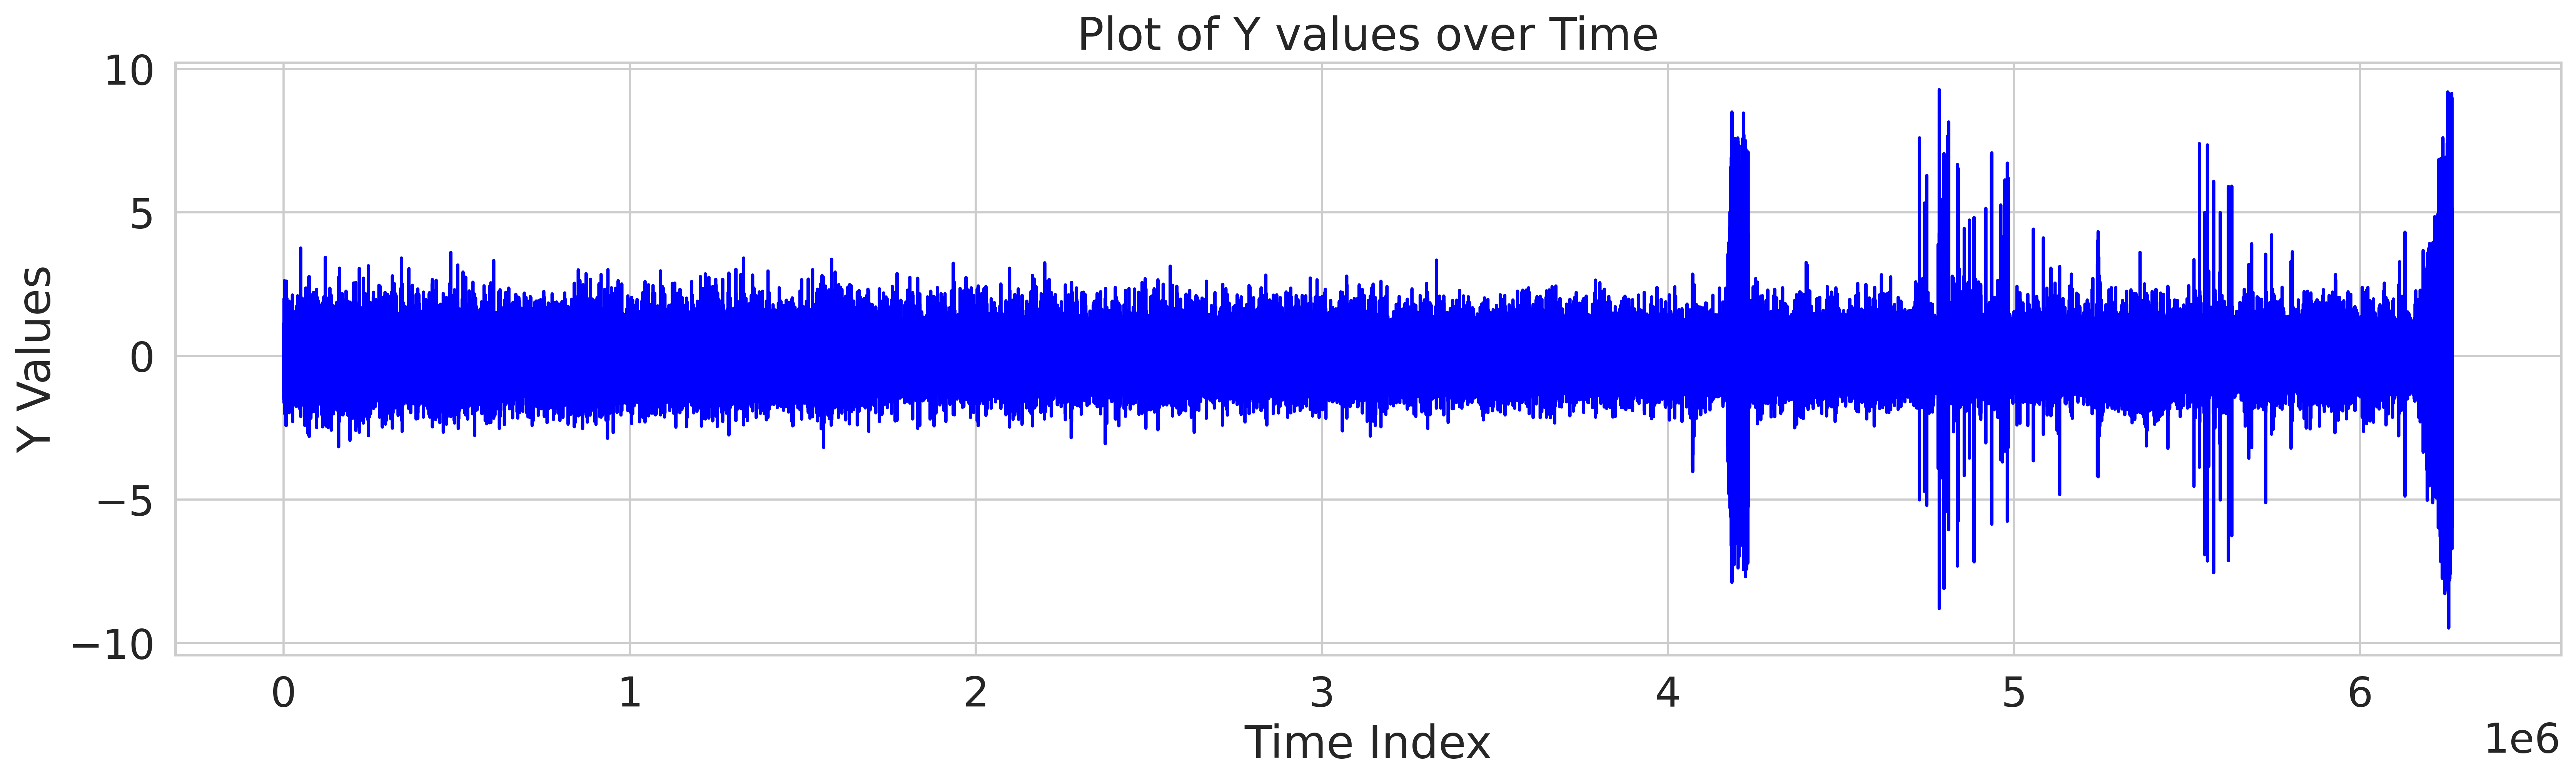

In [12]:
# Create a figure and axis
fig, ax = plt.subplots()

# Reset the index of the DataFrame
combined_data_reset = combined_data.reset_index(drop=True)

# Plot the data using integer index as x-axis
ax.plot(combined_data_reset.index, combined_data[4], color='blue')

# Customize the plot
ax.set_xlabel('Time Index')
ax.set_ylabel('Y Values')
ax.set_title('Plot of Y values over Time')

# Show the plot
plt.show()

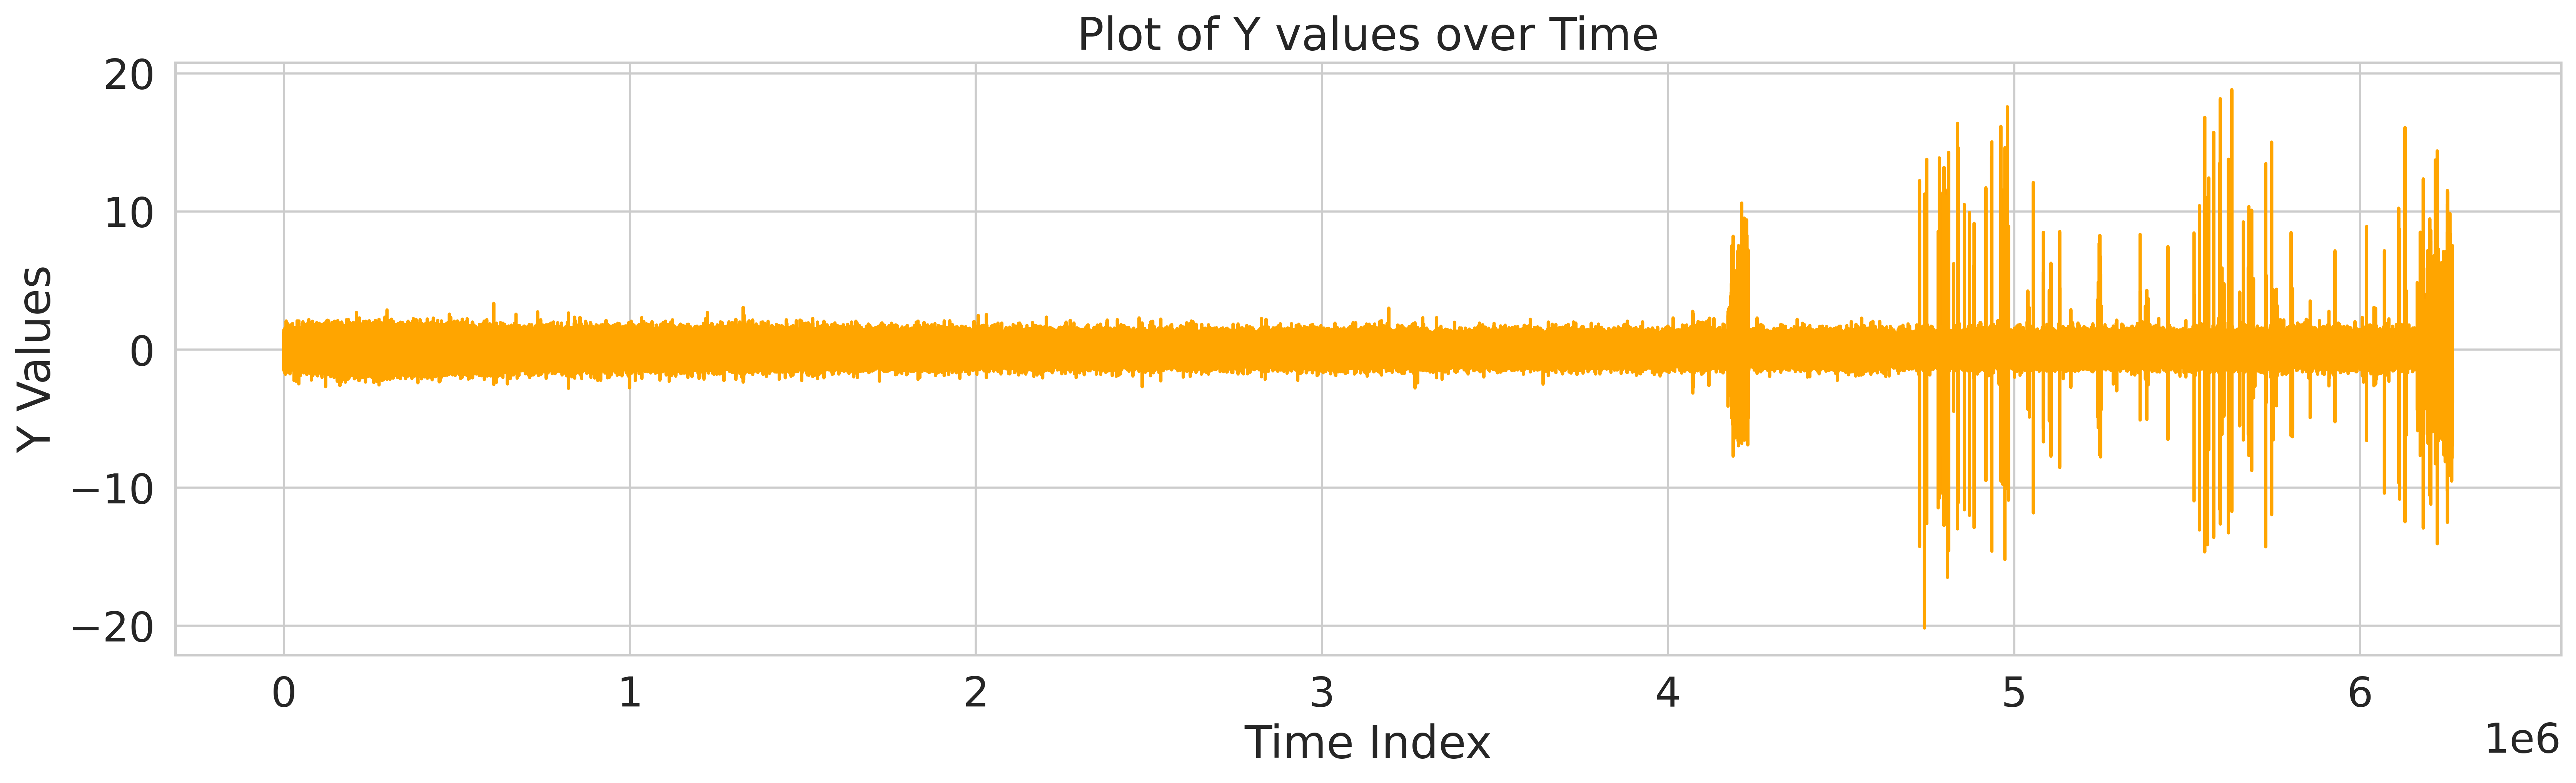

In [13]:
# Create a figure and axis
fig, ax = plt.subplots()

# Reset the index of the DataFrame
combined_data_reset = combined_data.reset_index(drop=True)

# Plot the data using integer index as x-axis
ax.plot(combined_data_reset.index, combined_data[5], color='orange')

# Customize the plot
ax.set_xlabel('Time Index')
ax.set_ylabel('Y Values')
ax.set_title('Plot of Y values over Time')

# Show the plot
plt.show()

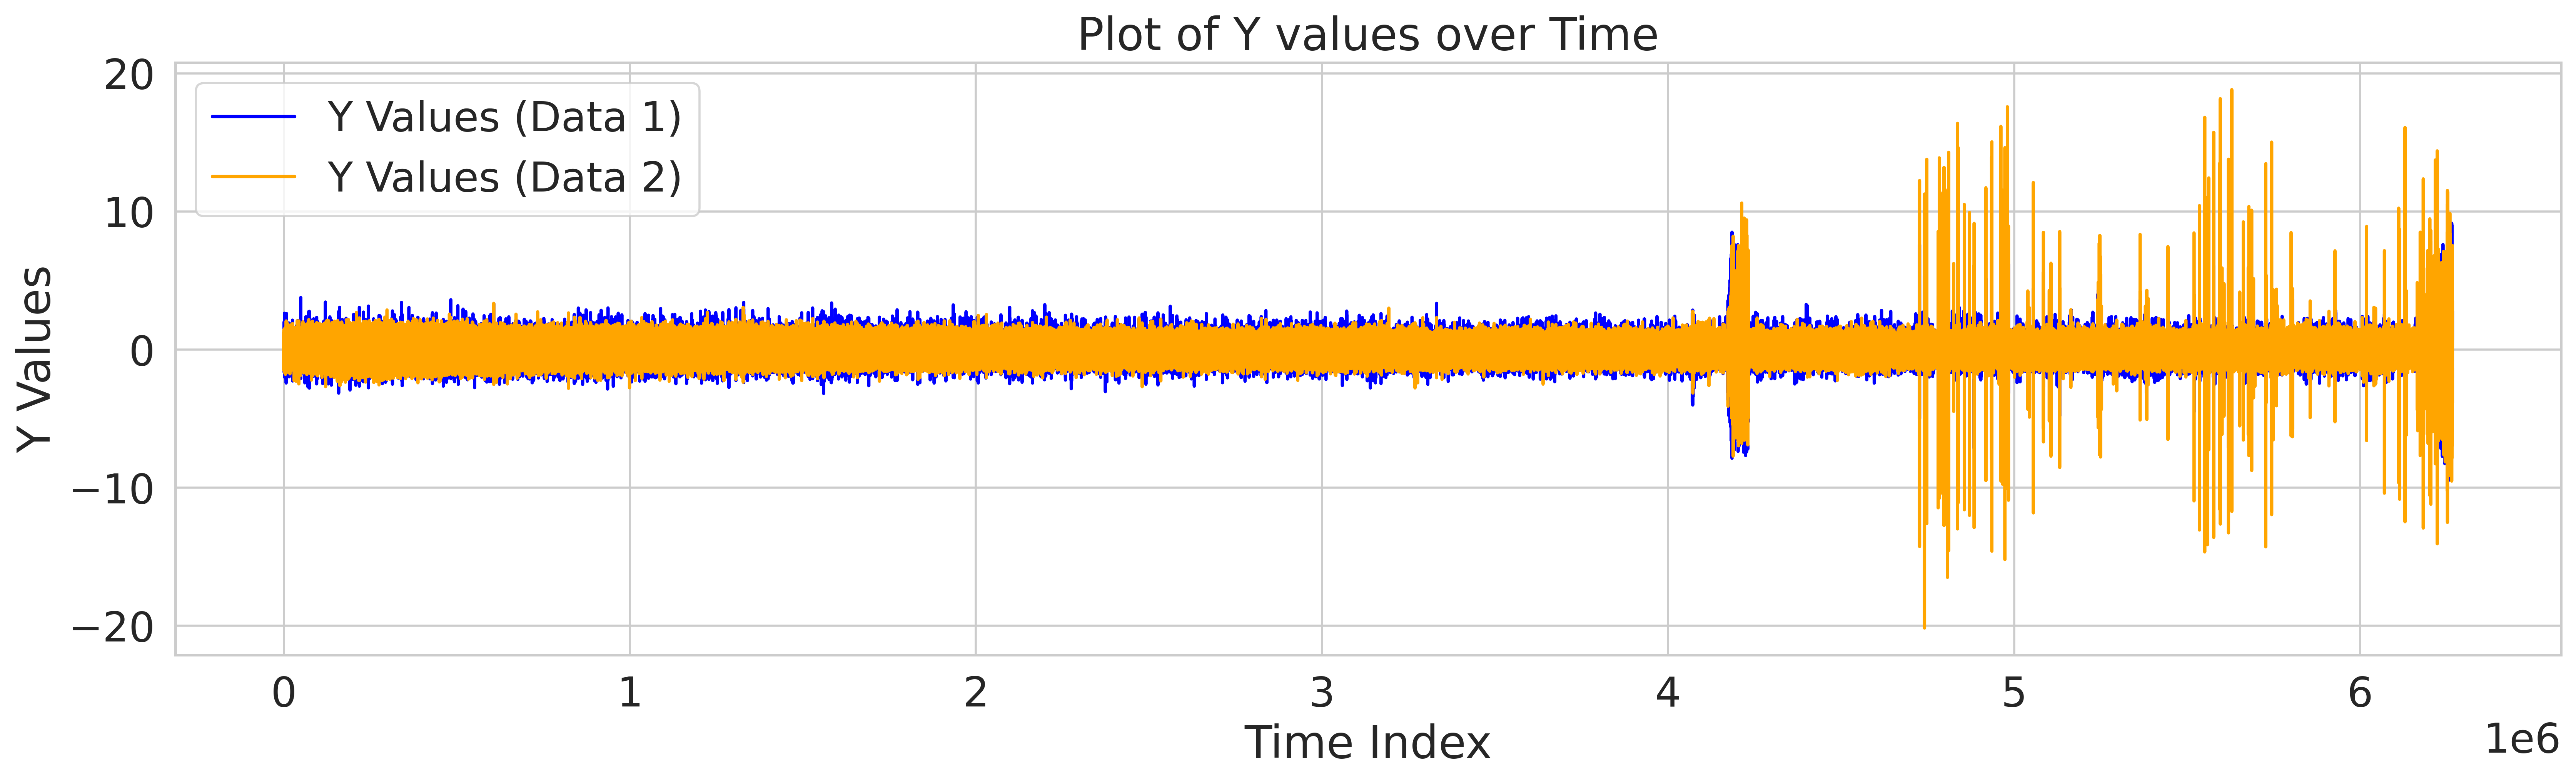

In [14]:
# Create a figure and axis
fig, ax = plt.subplots()

# Reset the index of the DataFrame
combined_data_reset = combined_data.reset_index(drop=True)

# Plot the data using integer index as x-axis
ax.plot(combined_data_reset.index, combined_data[4], color='blue', label='Y Values (Data 1)')
ax.plot(combined_data_reset.index, combined_data[5], color='orange', label='Y Values (Data 2)')

# Customize the plot
ax.set_xlabel('Time Index')
ax.set_ylabel('Y Values')
ax.set_title('Plot of Y values over Time')

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [ ]:
## dataframe to json 
# Determine the chunk size for saving to JSON (e.g., 10,000 rows per chunk)
chunk_size = 2560

# Calculate the number of chunks required
num_chunks = len(combined_data) // chunk_size + 1

# Specify the directory path for the JSON files
output_directory = "../Team-project/data/result/out/json/07-31-3"  # Replace with the desired directory path

# Save the DataFrame to JSON in smaller chunks
for i in range(num_chunks):
    start_idx = i * chunk_size
    end_idx = (i + 1) * chunk_size
    chunk_data = combined_data.iloc[start_idx:end_idx]
    
    # Save each chunk to a separate JSON file in the specified directory
    json_data = chunk_data.to_json(orient='records', lines=True)
    file_name = os.path.join(output_directory, f'data_chunk_{i}.json')
    with open(file_name, 'w') as json_file:
        json_file.write(json_data)